In [3]:
import pandas as pd
import numpy as np

# Dataset 1: "bank-additional"
df_bank = pd.read_csv("bank-additional.csv", sep=",")
pd.set_option('display.max_columns', None)
df_bank.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [4]:
import pandas as pd
import numpy as np

#Dataset 2: "customer-details" -> Cargamos todas las hojas
df_2012 = pd.read_excel("customer-details.xlsx", sheet_name=0) # Hoja 1
df_2013 = pd.read_excel("customer-details.xlsx", sheet_name=1) # Hoja 2
df_2014 = pd.read_excel("customer-details.xlsx", sheet_name=2) # Hoja 3

# Combinamos todas las hojas en un solo DataFrame
df_customers = pd.concat([df_2012, df_2013, df_2014], ignore_index=True)

pd.set_option('display.max_columns', None)
df_customers.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [5]:
# Inspección inicial de 'bank_additional'
df_bank.info()
df_bank.describe()
df_bank.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43000 non-null  int64  
 1   age             37880 non-null  float64
 2   job             42655 non-null  object 
 3   marital         42915 non-null  object 
 4   education       41193 non-null  object 
 5   default         34019 non-null  float64
 6   housing         41974 non-null  float64
 7   loan            41974 non-null  float64
 8   contact         43000 non-null  object 
 9   duration        43000 non-null  int64  
 10  campaign        43000 non-null  int64  
 11  pdays           43000 non-null  int64  
 12  previous        43000 non-null  int64  
 13  poutcome        43000 non-null  object 
 14  emp.var.rate    43000 non-null  float64
 15  cons.price.idx  42529 non-null  object 
 16  cons.conf.idx   43000 non-null  object 
 17  euribor3m       33744 non-null 

Unnamed: 0           0
age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
dtype: int64

In [6]:
# Observaciones de la inspección inicial:

# 1. La columna 'Unnamed 0:' probablemente sea un índice duplicado del CSV. Se puede eliminar.
# 2. Hay valores nulos en muchas columnas.
# 3. Hay columnas numéricas que están como tipo 'object' ("job", "marital", "education").
# 4. Las columnas 'age', 'default', 'housing' están como float64 pero representan booleanos (1 o 0).
# 5. Renombrar la columna 'id_' a 'ID' para asegurar que la unión se realice correctamente más adelante.


# Limpieza y Transformación de 'df_bank':

# 1. Eliminar columna innecesaria 'Unnamed: 0'
df_bank.drop(columns=["Unnamed: 0"], inplace=True)

# 2. Convertir columnas mal leídas como strings (object) a numéricas 
cols_float = ["cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
df_bank[cols_float] = df_bank[cols_float].apply(pd.to_numeric, errors='coerce')

# 3. Convertir columnas binarias a enteros
for col in ["default", "housing", "loan"]:
    df_bank[col] = df_bank[col].astype("Int64") # Permite nulos

# 4. Renombrar la columna 'id_' a 'ID'
df_bank = df_bank.rename(columns={'id_': 'ID'})


# 5. Verificar y mostrar nulos tras conversión
print(df_bank.isnull().sum())

age                5120
job                 345
marital              85
education          1807
default            8981
housing            1026
loan               1026
contact               0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx    43000
cons.conf.idx     38513
euribor3m         42985
nr.employed       34980
y                     0
date                248
latitude              0
longitude             0
ID                    0
dtype: int64


In [7]:
# Comprobamos cambios realizados:

# 1. Columna 'Unnamed: 0' eliminada
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,ID
0,NaN,housemaid,MARRIED,basic.4y,0,0,0,telephone,261,1,999,0,NONEXISTENT,1.1,NaN,NaN,NaN,5191.0,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,<NA>,0,0,telephone,149,1,999,0,NONEXISTENT,1.1,NaN,NaN,NaN,5191.0,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0,1,0,telephone,226,1,999,0,NONEXISTENT,1.1,NaN,NaN,NaN,5191.0,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0,0,0,telephone,151,1,999,0,NONEXISTENT,1.1,NaN,NaN,NaN,5191.0,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0,0,1,telephone,307,1,999,0,NONEXISTENT,1.1,NaN,NaN,NaN,5191.0,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [8]:
# 2. Columnas de tipo string convertidas a float
# 3. Columnas binarias convertidas a enteros
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37880 non-null  float64
 1   job             42655 non-null  object 
 2   marital         42915 non-null  object 
 3   education       41193 non-null  object 
 4   default         34019 non-null  Int64  
 5   housing         41974 non-null  Int64  
 6   loan            41974 non-null  Int64  
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  0 non-null      float64
 15  cons.conf.idx   4487 non-null   float64
 16  euribor3m       15 non-null     float64
 17  nr.employed     8020 non-null  

In [9]:
# Inspección inicial de 'customers'

df_customers.info()
df_customers.describe()
df_customers.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43170 entries, 0 to 43169
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         43170 non-null  int64         
 1   Income             43170 non-null  int64         
 2   Kidhome            43170 non-null  int64         
 3   Teenhome           43170 non-null  int64         
 4   Dt_Customer        43170 non-null  datetime64[ns]
 5   NumWebVisitsMonth  43170 non-null  int64         
 6   ID                 43170 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.3+ MB


Unnamed: 0           0
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
ID                   0
dtype: int64

In [10]:
# Observaciones de la inspección inicial:

# 1. No hay nulos.
# 2. La columna 'Unnamed: 0' es irrelevante, por lo que hay que eliminarla.
# 3. La columna 'ID' es clave para unir con 'df_bank'.
# 4. La columna 'DT_Customer' ya está bien en formato "datetime64".

# Limpieza y Transformación de 'customers':

# 1. Eliminar columna innecesaria 'Unnamed: 0'
df_customers.drop(columns=["Unnamed: 0"], inplace=True)

# Verificación de cambios realizados
df_customers.head()

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [11]:
# Confirmamos que no hay duplicados
print(df_customers.duplicated().sum()) # Debería dar 0

# Confirmamos que la columna 'ID' no tiene duplicados
print(df_customers["ID"].duplicated().sum()) # Debería dar 0


0
0


In [12]:
# Unión de los DataFrames

# Asegurar que el tipo de la columna 'ID' es el mismo en ambos dataframes
df_bank['ID'] = df_bank['ID'].astype(str)
df_customers['ID'] = df_customers['ID'].astype(str)

# Merge
df_merged = pd.merge(df_bank, df_customers, on='ID', how='inner')

# Confirmar que la columna 'y' está bien
print(df_merged['y'].value_counts(dropna=False))

print(df_merged.info())


y
no     38156
yes     4844
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   age                37880 non-null  float64       
 1   job                42655 non-null  object        
 2   marital            42915 non-null  object        
 3   education          41193 non-null  object        
 4   default            34019 non-null  Int64         
 5   housing            41974 non-null  Int64         
 6   loan               41974 non-null  Int64         
 7   contact            43000 non-null  object        
 8   duration           43000 non-null  int64         
 9   campaign           43000 non-null  int64         
 10  pdays              43000 non-null  int64         
 11  previous           43000 non-null  int64         
 12  poutcome           43000 non-null  object        
 13  emp.var

In [13]:
# Verificamos si las columnas 'ID' son iguales para eliminar una y que no esté duplicada
(df_merged['id_'] == df_merged['ID']).all() # Debería dar 'True'


KeyError: 'id_'

In [14]:
# Eliminamos una de las columnas duplicadas
df_merged.drop(columns=["id_"], inplace=True)

KeyError: "['id_'] not found in axis"

In [16]:
# Establecemos la columna 'ID' como índice
df_merged.set_index("ID", inplace=True)


In [17]:
# Verificamos el resultado
print(df_merged.index.name) # Debería decir 'ID'
df_merged.head() # Ya no se verá esa columna, sino como índice

ID


,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
089b39d8-e4d0-461b-87d4-814d71e0e079,NaN,housemaid,MARRIED,basic.4y,0,0,0,telephone,261,1,999,0,NONEXISTENT,1.1,NaN,NaN,NaN,5191.0,no,2-agosto-2019,41.495,-71.233,161770,1,0,2012-04-04,29
e9d37224-cb6f-4942-98d7-46672963d097,57.0,services,MARRIED,high.school,<NA>,0,0,telephone,149,1,999,0,NONEXISTENT,1.1,NaN,NaN,NaN,5191.0,no,14-septiembre-2016,34.601,-83.923,85477,1,1,2012-12-30,7
3f9f49b5-e410-4948-bf6e-f9244f04918b,37.0,services,MARRIED,high.school,0,1,0,telephone,226,1,999,0,NONEXISTENT,1.1,NaN,NaN,NaN,5191.0,no,15-febrero-2019,34.939,-94.847,147233,1,1,2012-02-02,5
9991fafb-4447-451a-8be2-b0df6098d13e,40.0,admin.,MARRIED,basic.6y,0,0,0,telephone,151,1,999,0,NONEXISTENT,1.1,NaN,NaN,NaN,5191.0,no,29-noviembre-2015,49.041,-70.308,121393,1,2,2012-12-21,29
eca60b76-70b6-4077-80ba-bc52e8ebb0eb,56.0,services,MARRIED,high.school,0,0,1,telephone,307,1,999,0,NONEXISTENT,1.1,NaN,NaN,NaN,5191.0,no,29-enero-2017,38.033,-104.463,63164,1,2,2012-06-20,20


In [18]:
# Análisis Exploratorio de Datos del DataFrame 'df_merged'

# Obtenemos las estadísticas generales para todas las columnas
df_merged.describe(include='all')  # para todas las variables


,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth
count,37880.000000,42655,42915,41193,34019.0,41974.0,41974.0,43000,43000.000000,43000.000000,43000.000000,43000.000000,43000,43000.000000,0.0,4487.000000,15.0,8020.0,43000,42752,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000,43000.000000
unique,NaN,11,3,7,<NA>,<NA>,<NA>,2,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2,1825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,admin.,MARRIED,university.degree,<NA>,<NA>,<NA>,cellular,NaN,NaN,NaN,NaN,NONEXISTENT,NaN,NaN,NaN,NaN,NaN,no,28-febrero-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10873,25999,12722,<NA>,<NA>,<NA>,27396,NaN,NaN,NaN,NaN,37103,NaN,NaN,NaN,NaN,NaN,38156,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39.977112,NaN,NaN,NaN,0.000088,0.535998,0.15562,NaN,257.739279,2.567233,962.330953,0.174023,NaN,0.077128,NaN,-42.069757,1.0,5191.0,NaN,NaN,36.856697,-95.939067,93241.200070,1.004791,0.998605,2013-05-12 07:05:06.083720960,16.589698
min,17.000000,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,NaN,-50.000000,1.0,5191.0,NaN,NaN,24.396000,-124.997000,5841.000000,0.000000,0.000000,2012-01-01 00:00:00,1.000000
25%,32.000000,NaN,NaN,NaN,0.0,0.0,0.0,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,NaN,-42.000000,1.0,5191.0,NaN,NaN,30.614750,-110.494250,49610.000000,0.000000,0.000000,2012-07-16 00:00:00,9.000000
50%,38.000000,NaN,NaN,NaN,0.0,1.0,0.0,NaN,179.000000,2.000000,999.000000,0.000000,NaN,1.100000,NaN,-42.000000,1.0,5191.0,NaN,NaN,36.761000,-95.899500,93050.500000,1.000000,1.000000,2013-03-02 00:00:00,17.000000
75%,47.000000,NaN,NaN,NaN,0.0,1.0,0.0,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,NaN,-42.000000,1.0,5191.0,NaN,NaN,43.113250,-81.427750,136744.500000,2.000000,2.000000,2014-03-29 00:00:00,25.000000
max,98.000000,NaN,NaN,NaN,1.0,1.0,1.0,NaN,4918.000000,56.000000,999.000000,7.000000,NaN,1.400000,NaN,-33.000000,1.0,5191.0,NaN,NaN,49.384000,-66.937000,180802.000000,2.000000,2.000000,2014-12-31 00:00:00,32.000000


In [19]:
# ¿Qué porcentaje de clientes suscribió el producto?

# Conteo de valores y proporciones
df_merged['y'].value_counts(normalize=True) * 100  # % de suscripción

# El 89% de los clientes no suscribió el producto, mientras que el 11% sí que lo hizo.

# Esto refelja la necesidad de optimizar las campañas de suscripción del banco. Para ello, realizaremos un análisis de las variables 
# (numéricas y categóricas) con el fin de identificar patrones y mejorar la tasa de éxito a través de segmentaciones.


y
no     88.734884
yes    11.265116
Name: proportion, dtype: float64

In [20]:
# Obtención de las medias, desviaciones, mínimos y máximos para entender la distribución general y detectar valores anómalos:

df_merged[['age', 'Income', 'duration', 'campaign', 'NumWebVisitsMonth', 'Kidhome', 'Teenhome', 'pdays', 'previous']].describe()

# Análisis: 

# 1. Edad: Media de 40 años. La mayoría de los clientes están entre los 32 y 47 años (Q3). 
# Existe una distribución algo sesgada hacia la derecha.
# ¿Qué grupos de edades son más propensos a suscribirse?

# 2. Ingresos: Media muy alta (93k€). La distribución está sesgada hacia la derecha, por lo que existen pocos clientes muy ricos.

# 3. Duración de la última llamada: Gran dispersión y asimetría.
# Algunos clientes no hablaron nada, por lo que es posible que no fueran contactados.

# 4. Campaign: La mayoría de clientes fueron contactados entre 1 y 3 veces. Hay outliers importantes (hasta 56).
# ¿Contactar mucho cansa o mejora los resultados?

# 5. Visitas Web: El 75% tiene 25 o menos visitas, pero hay clientes con actividad web muy alta.



,age,Income,duration,campaign,NumWebVisitsMonth,Kidhome,Teenhome,pdays,previous
count,37880.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000
mean,39.977112,93241.200070,257.739279,2.567233,16.589698,1.004791,0.998605,962.330953,0.174023
std,10.437957,50498.316182,258.666033,2.772294,9.239205,0.815913,0.815983,187.260394,0.497366
min,17.000000,5841.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,49610.000000,102.000000,1.000000,9.000000,0.000000,0.000000,999.000000,0.000000
50%,38.000000,93050.500000,179.000000,2.000000,17.000000,1.000000,1.000000,999.000000,0.000000
75%,47.000000,136744.500000,319.000000,3.000000,25.000000,2.000000,2.000000,999.000000,0.000000
max,98.000000,180802.000000,4918.000000,56.000000,32.000000,2.000000,2.000000,999.000000,7.000000


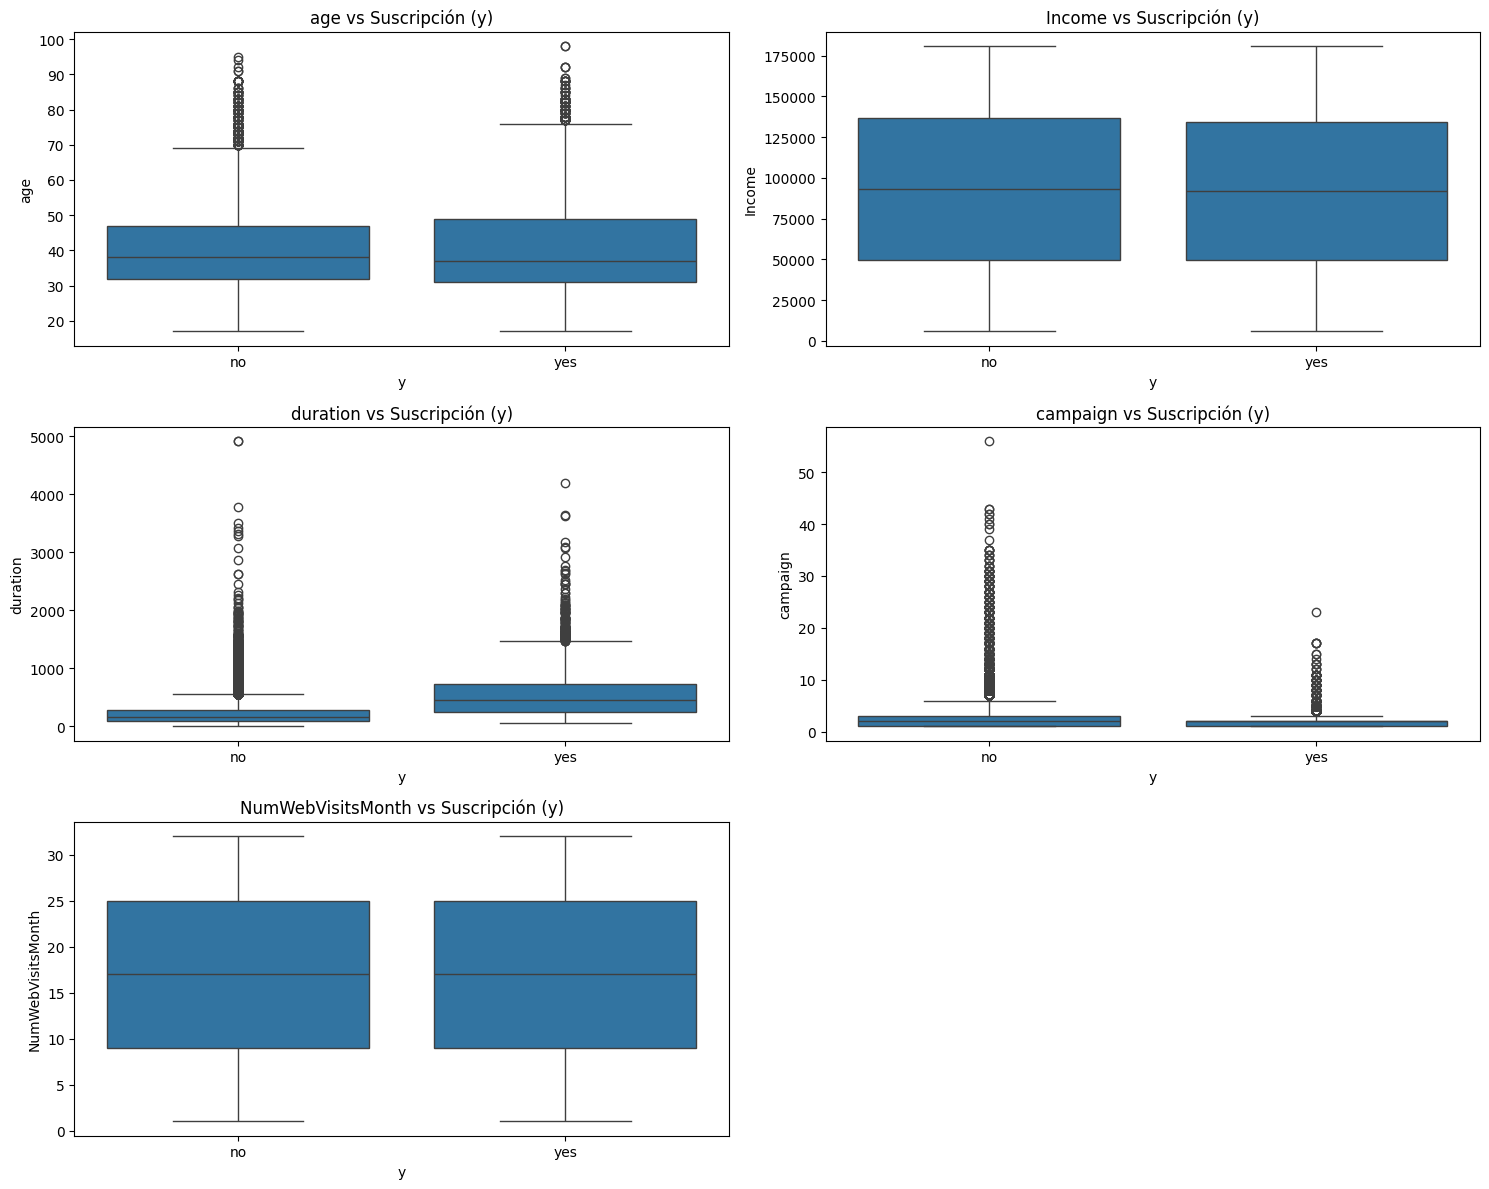

In [21]:
# Análisis bivariado de variables numéricas vs la variable 'y' (Suscripción):

#Analizamos si existe alguna relación entre cada variable numérica (age, income, duration, campaign, NumWebVisitsMonth)
# y la probabilidad de suscribirse (y = "yes"), para detectar posibles patrones predictivos o perfiles más propensos a aceptar la campaña.

import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas a comparar
numeric_vars = ['age', 'Income', 'duration', 'campaign', 'NumWebVisitsMonth']

plt.figure(figsize=(15, 12))

for i, var in enumerate(numeric_vars, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='y', y=var, data=df_merged)
    plt.title(f'{var} vs Suscripción (y)')

plt.tight_layout()
plt.show()


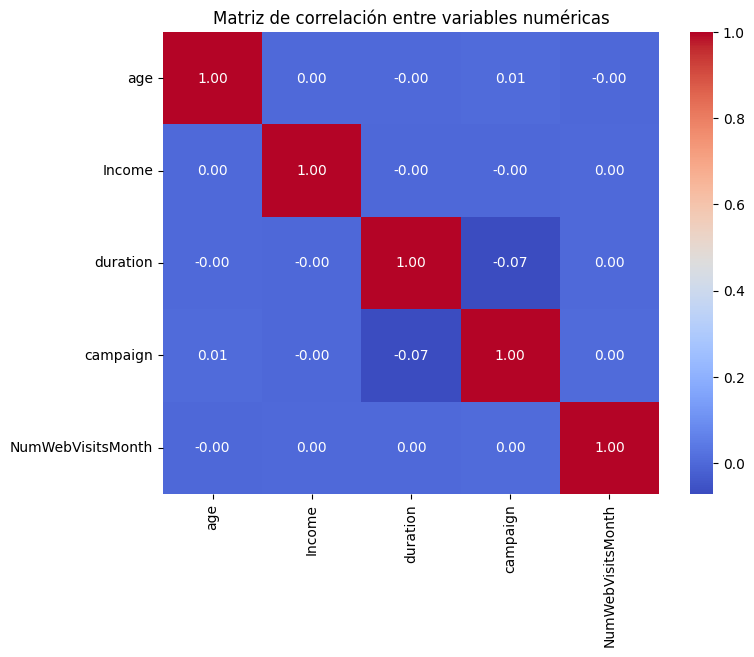

In [22]:
# Análisis multivariado o de correlación de las variables numéricas:

# Objetivo: Evaluar relaciones entre múltiples variables y cuantificar qué tan relacionadas están con el objetivo y.
import seaborn as sns

corr_matrix = df_merged[['age', 'Income', 'duration', 'campaign', 'NumWebVisitsMonth']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

# Conclusión:

# Relación de 'age': La edad no está asociada linealmente ni con ingresos, duración de llamada, número de contactos ni visitas web.
# Relación de 'Income': Los ingresos tampoco están correlacionados con ninguna de las variables numéricas analizadas.
# Relación de 'duration': Hay una relación negativa muy débil entre duración de llamada y número de contactos en la campaña.
# Esto podría sugerir que cuando se contacta más veces, las llamadas tienden a ser un poco más cortas, aunque la relación es mínima.
# Relación de 'campaign': El número de contactos en la campaña no está asociada linealmente con ninguna variable, 
# salvo la dicha anteriormente con 'duration'.
# Relación de 'NumWebVisitsMonth': El número de visitas mensuales en la web no está linealmente asociada con ninguna variable.

# No existe ninguna correlación significativa (ni positiva ni negativa) entre las variables numéricas analizadas.
# El único par con una ligera relación negativa es 'duration' y 'campaign', pero su valor (-0.07) sigue siendo 
# demasiado bajo para ser relevante.


/var/folders/48/0cq74lwd20z1gzx1drhf3jg00000gn/T/ipykernel_2515/3137641497.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_age_group = df_merged.groupby('age_group').size()
/var/folders/48/0cq74lwd20z1gzx1drhf3jg00000gn/T/ipykernel_2515/3137641497.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_by_age_group = df_merged[df_merged['y'] == 'yes'].groupby('age_group').size()


Tasa de suscripción (%) por grupo de edad:
age_group
17-24    20.836013
25-34    11.608902
35-44     8.591036
45-54     8.684699
55-64    15.404603
65-74    42.028986
75-84    52.879581
85-98    47.500000
dtype: float64


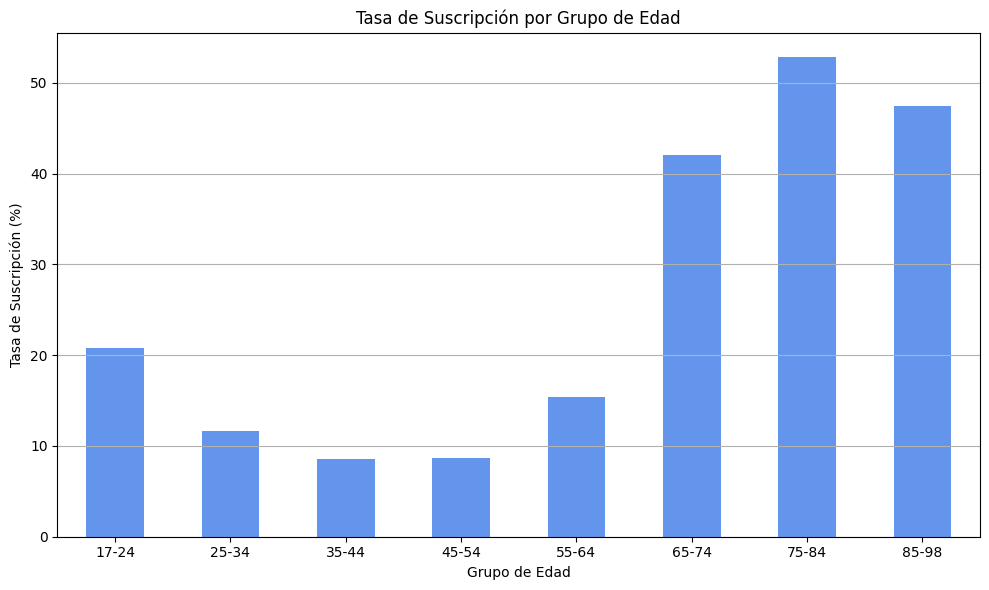

In [23]:
# Análisis de la variable 'age' por grupos para analizar si existe alguna relación de estos grupos con la suscripción:

# 1. Definir los rangos de edad
bins = [17, 25, 35, 45, 55, 65, 75, 85, 98]
labels = ['17-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-98']

# 2. Crear columna con grupo de edad
df_merged['age_group'] = pd.cut(df_merged['age'], bins=bins, labels=labels, right=True)

# 3. Calcular total y éxitos por grupo
total_by_age_group = df_merged.groupby('age_group').size()
success_by_age_group = df_merged[df_merged['y'] == 'yes'].groupby('age_group').size()

# 4. Calcular tasa de suscripción (%)
success_rate_by_age_group = (success_by_age_group / total_by_age_group * 100).fillna(0)

# 5. Mostrar resultados
print("Tasa de suscripción (%) por grupo de edad:")
print(success_rate_by_age_group)

# 6. Visualización
plt.figure(figsize=(10,6))
success_rate_by_age_group.plot(kind='bar', color='cornflowerblue')
plt.title('Tasa de Suscripción por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Tasa de Suscripción (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Conclusión:

# Los grupos de edad más propensos a suscribirse son '75-84' con un 52.88%, '85-98' con un 47.5% y '65-74' con un 42.03%.
# Se puede concluir que las personas mayores tienen una mayor predisposición a suscribirse.


/var/folders/48/0cq74lwd20z1gzx1drhf3jg00000gn/T/ipykernel_2515/3660968567.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_income_group = df_merged.groupby('income_group').size()
/var/folders/48/0cq74lwd20z1gzx1drhf3jg00000gn/T/ipykernel_2515/3660968567.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_by_income_group = df_merged[df_merged['y'] == 'yes'].groupby('income_group').size()


Tasa de suscripción (%) por grupo de ingresos:
income_group
5k-20k       10.827843
20k-40k      11.730382
40k-60k      11.199348
60k-80k      11.767118
80k-100k     11.492628
100k-120k    11.817238
120k-140k    10.769536
140k-160k    10.475406
160k-180k    11.194177
dtype: float64


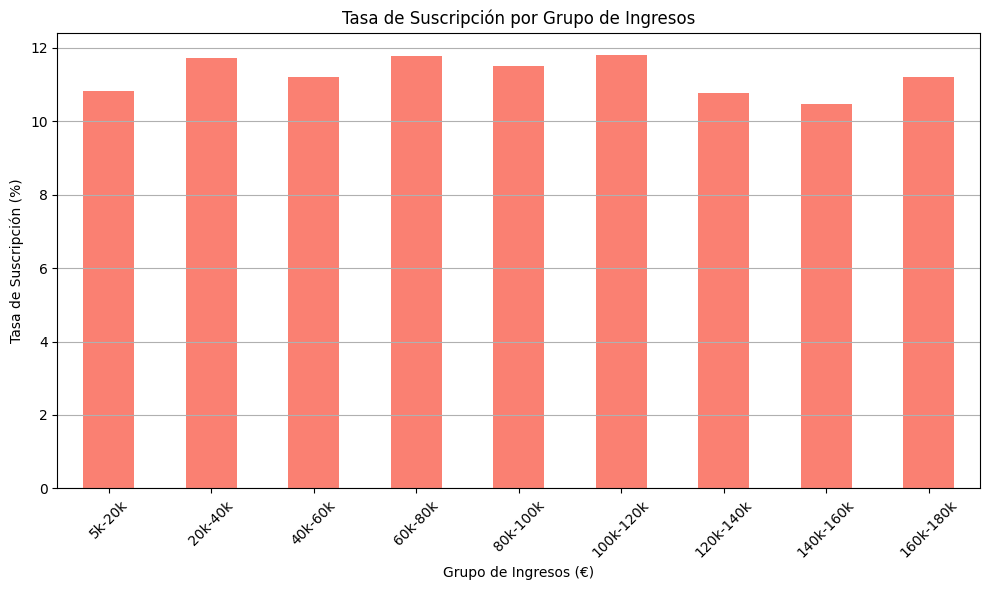

In [24]:
# Análisis de la variable 'Income' por grupos para analizar si existe alguna relación de estos grupos con la suscripción:

# 1. Definir los rangos de ingreso
bins = [5000, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180802]
labels = ['5k-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k-140k', '140k-160k', '160k-180k']

# 2. Crear columna con grupo de ingreso
df_merged['income_group'] = pd.cut(df_merged['Income'], bins=bins, labels=labels, right=True)

# 3. Calcular total y éxitos por grupo de ingreso
total_by_income_group = df_merged.groupby('income_group').size()
success_by_income_group = df_merged[df_merged['y'] == 'yes'].groupby('income_group').size()

# 4. Calcular tasa de suscripción (%)
success_rate_by_income_group = (success_by_income_group / total_by_income_group * 100).fillna(0)

# 5. Mostrar resultados
print("Tasa de suscripción (%) por grupo de ingresos:")
print(success_rate_by_income_group)

# 6. Visualización
plt.figure(figsize=(10,6))
success_rate_by_income_group.plot(kind='bar', color='salmon')
plt.title('Tasa de Suscripción por Grupo de Ingresos')
plt.xlabel('Grupo de Ingresos (€)')
plt.ylabel('Tasa de Suscripción (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Conclusión:

# Todas las tasas de suscripción son bastante homogéneas, por lo que no hay un grupo que destaque.
# El ingreso por sí solo no determina la probabilidad de suscripción. Esto sugiere que el interés en el producto bancario 
# es relativamente independiente del nivel económico, o que el producto tiene un enfoque generalista atractivo para todos los segmentos.


📊 Tasa de suscripción (%) según número de hijos pequeños (Kidhome):
Kidhome
0    11.344124
1    11.096424
2    11.355438
dtype: float64


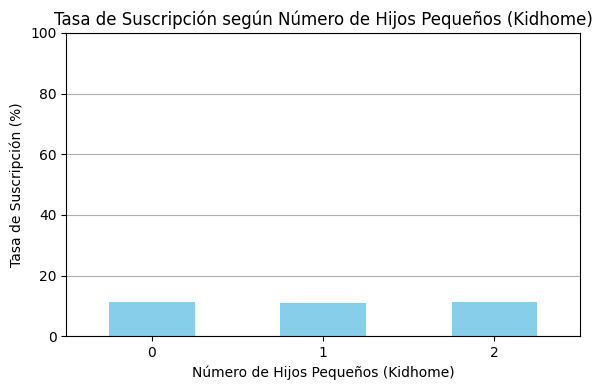

In [25]:
# Análisis de la variable 'Kidhome' por grupos para analizar si existe alguna relación de estos grupos con la suscripción:

# Calcular número total de registros por valor de Kidhome
total_by_kidhome = df_merged.groupby('Kidhome').size()

# Calcular número de suscripciones exitosas por valor de Kidhome
success_by_kidhome = df_merged[df_merged['y'] == 'yes'].groupby('Kidhome').size()

# Calcular la tasa de suscripción (%)
success_rate_kidhome = (success_by_kidhome / total_by_kidhome * 100).fillna(0)

# Mostrar resultados
print("📊 Tasa de suscripción (%) según número de hijos pequeños (Kidhome):")
print(success_rate_kidhome)

# Visualización
plt.figure(figsize=(6,4))
success_rate_kidhome.plot(kind='bar', color='skyblue')
plt.title('Tasa de Suscripción según Número de Hijos Pequeños (Kidhome)')
plt.xlabel('Número de Hijos Pequeños (Kidhome)')
plt.ylabel('Tasa de Suscripción (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Conclusión:

# La variable 'Kidhome' no influye significativamente en la decisión de suscribirse. El tener hijos pequeños no afecta 
# la suscripción del producto bancario.

📊 Tasa de suscripción (%) según número de adolescentes en casa (Teenhome):
Teenhome
0    11.362844
1    11.127349
2    11.305565
dtype: float64


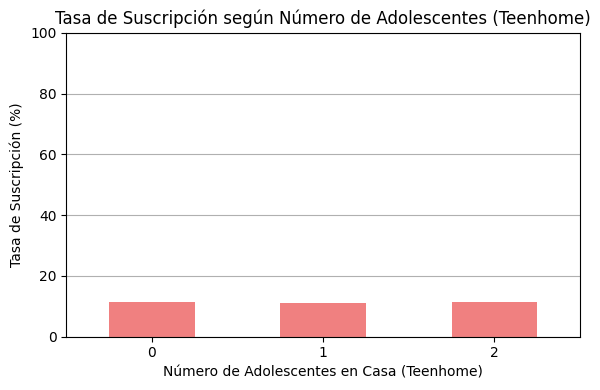

In [26]:
# Análisis de la variable 'Teenhome' por grupos para analizar si existe alguna relación de estos grupos con la suscripción:

# Calcular número total de registros por valor de Teenhome
total_by_teenhome = df_merged.groupby('Teenhome').size()

# Calcular número de suscripciones exitosas por valor de Teenhome
success_by_teenhome = df_merged[df_merged['y'] == 'yes'].groupby('Teenhome').size()

# Calcular la tasa de suscripción (%)
success_rate_teenhome = (success_by_teenhome / total_by_teenhome * 100).fillna(0)

# Mostrar resultados
print("📊 Tasa de suscripción (%) según número de adolescentes en casa (Teenhome):")
print(success_rate_teenhome)

# Visualización
plt.figure(figsize=(6,4))
success_rate_teenhome.plot(kind='bar', color='lightcoral')
plt.title('Tasa de Suscripción según Número de Adolescentes (Teenhome)')
plt.xlabel('Número de Adolescentes en Casa (Teenhome)')
plt.ylabel('Tasa de Suscripción (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Conclusión:

# Al igual que con 'Kidhome', el número de adolescentes en casa ('Teenhome') no parece tener un impacto significativo en la 
# probabilidad de suscripción.


📊 Tasa de suscripción (%) según grupo de 'pdays':
pdays_group
Reciente         66.034483
Intermedio       58.644860
No contactado     9.241283
dtype: float64


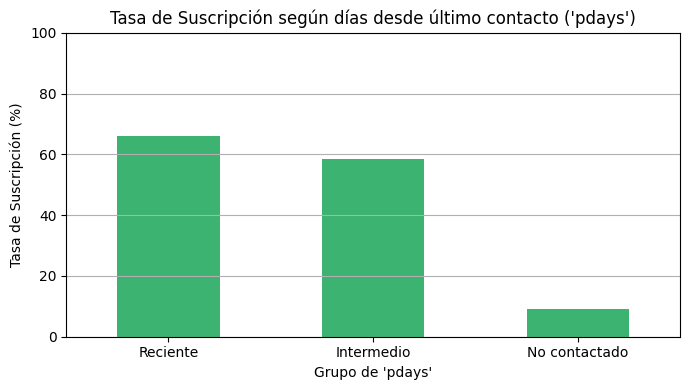

In [27]:
# Análisis de la variable 'pdays' por grupos para analizar si existe alguna relación de estos grupos con la suscripción:

# Crear categorías para 'pdays'
def categorize_pdays(pdays):
    if pdays == 999:
        return 'No contactado'
    elif pdays <= 6:
        return 'Reciente'
    elif pdays <= 30:
        return 'Intermedio'
    else:
        return 'Antiguo'

df_merged['pdays_group'] = df_merged['pdays'].apply(categorize_pdays)

# Calcular tasa de suscripción por grupo
total_by_pdays = df_merged.groupby('pdays_group').size()
success_by_pdays = df_merged[df_merged['y'] == 'yes'].groupby('pdays_group').size()
success_rate_pdays = (success_by_pdays / total_by_pdays * 100).fillna(0).sort_values(ascending=False)

# Mostrar resultados
print("📊 Tasa de suscripción (%) según grupo de 'pdays':")
print(success_rate_pdays)

# Visualización
plt.figure(figsize=(7,4))
success_rate_pdays.plot(kind='bar', color='mediumseagreen')
plt.title("Tasa de Suscripción según días desde último contacto ('pdays')")
plt.xlabel("Grupo de 'pdays'")
plt.ylabel("Tasa de Suscripción (%)")
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Conclusión:

# Cuanto más reciente fue el contacto previo, mayor es la tasa de suscripción. Contactar a los clientes nuevamente en los primeros días 
# tras un contacto anterior se asocia con un alto éxito. 
# Los clientes que nunca fueron contactados antes (valor especial 999) presentan una tasa de suscripción mucho más baja.
# Existe una relación fuerte y positiva entre el seguimiento rápido y la probabilidad de conversión.

# La campaña parece más efectiva cuando el cliente tiene un historial reciente de contacto. Puede deberse a que estos clientes 
# están más comprometidos, tienen presente la oferta o se sienten más valorados.


📊 Tasa de suscripción (%) según número de contactos previos:
previous
0     8.815999
1    21.096693
2    46.564885
3    60.344828
4    54.666667
5    75.000000
6    60.000000
7     0.000000
Name: y, dtype: float64


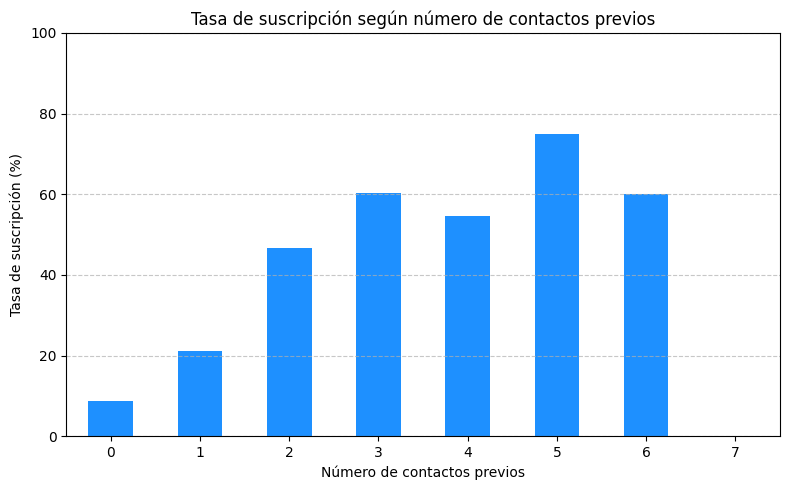

In [28]:
# Análisis de la variable 'previous' por grupos para analizar si existe alguna relación de estos grupos con la suscripción:

# Asegurar que 'y' es numérica (1 para 'yes', 0 para 'no')
df_merged['y'] = df_merged['y'].map({'yes': 1, 'no': 0})

# Calcular tasa de suscripción (%) por número de contactos previos
subscription_by_previous = df_merged.groupby('previous')['y'].mean() * 100

# Mostrar resultados ordenados
print("📊 Tasa de suscripción (%) según número de contactos previos:")
print(subscription_by_previous.sort_index())

# Gráfico de barras
plt.figure(figsize=(8,5))
subscription_by_previous.sort_index().plot(kind='bar', color='dodgerblue')
plt.title('Tasa de suscripción según número de contactos previos')
plt.xlabel('Número de contactos previos')
plt.ylabel('Tasa de suscripción (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Conclusión:

# Los clientes con 0 contactos previos tienen una tasa muy baja (8.82%), lo que indica que no haber contactado antes 
# reduce la probabilidad de suscripción.
# La tasa alcanza un pico alto alrededor de 5 contactos previos (75%), sugiriendo que los múltiples intentos de contacto 
# aumentan mucho las probabilidades de conversión.

# Hacer seguimientos repetidos con el cliente parece ser una estrategia efectiva para aumentar la tasa de suscripción.
# Sin embargo, un número excesivo de contactos (como 7) no muestra éxito, posiblemente por pocos datos o rechazo del cliente.
# La empresa podría plantearse un límite óptimo de 6 intentos de contacto para maximizar resultados y evitar desgaste.


In [ ]:
# Conclusiones de cada variable del Análisis bivariado:

# 1. Edad vs Suscripción
# Observación: Las distribuciones de edad entre los que suscriben (yes) y los que no (no) son muy similares, con medianas prácticamente iguales.
# Conclusión: La edad por sí sola no parece ser un fuerte diferenciador para la probabilidad de suscripción.

# 2. Ingresos vs Suscripción
# Observación: Las distribuciones y medianas son casi idénticas entre ambos grupos.
# Conclusión: El nivel de ingresos no muestra diferencias significativas entre quienes suscriben y quienes no. Por lo tanto, 
# podría no ser un predictor útil por sí solo.

# 3. Duración vs Suscripción
# Observación: La duración de la última llamada es visiblemente más alta en quienes dijeron “yes”: la mediana es claramente mayor, 
# y la distribución muestra colas más largas hacia valores altos en el grupo “yes”.
# Conclusión: La duración de la llamada es un factor fuertemente asociado a la suscripción; llamadas más largas tienden a terminar 
# en suscripción.

# 4. Campaign vs Suscripción
# Observación: Los clientes que finalmente suscriben (“yes”) tienden a haber recibido menos contactos, mostrando distribuciones 
# con medianas más bajas que el grupo “no”.
# Conclusión: Un menor número de contactos parece estar relacionado con mayor éxito: insistir demasiado podría ser contraproducente.

# 5. Visitas Web vs Suscripción
# Observación: Las distribuciones entre “yes” y “no” son muy similares, sin diferencias visibles en medianas ni en rangos.
# Conclusión: El número de visitas al sitio web no parece influir significativamente en la decisión de suscripción.

# Resumen del Análisis bivariado:

# Duration -> cuanto más larga es la llamada, mayor probabilidad de suscripción.
# Campaign -> menos intentos, mayor tasa de éxito.
# Variables con poca o nula relación aparente -> 'age', 'Income' y 'NumWebVisitsMonth'.

y                      0          1
job                                
admin.         86.986112  13.013888
blue-collar    93.111664   6.888336
entrepreneur   91.721419   8.278581
housemaid      90.115761   9.884239
management     88.786885  11.213115
retired        74.804469  25.195531
self-employed  89.187374  10.812626
services       91.926958   8.073042
student        68.660022  31.339978
technician     89.154569  10.845431
unemployed     85.606773  14.393227


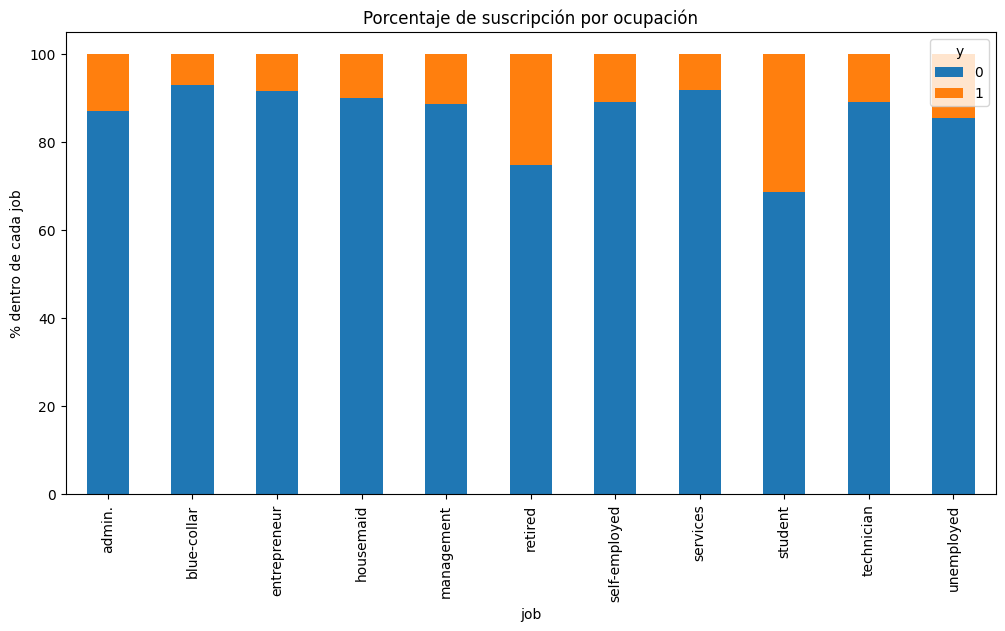

In [29]:
# Análisis bivariado de variables categóricas vs 'y' (Suscripción):

# 1. Identificar profesiones con mayor o menor propensión a suscribirse.
job_y = df_merged.groupby('job')['y'].value_counts(normalize=True).unstack().fillna(0) * 100
print(job_y)
job_y.plot(kind='bar', stacked=True, figsize=(12,6))
plt.ylabel('% dentro de cada job')
plt.title('Porcentaje de suscripción por ocupación')
plt.show()

# Conclusión:

# Las profesiones con mayor tasa de suscripción son 'Student' y 'Retired'.
# Las profesiones con menor tasa de suscripción son 'Blue-collar', 'Housemaid' y 'Services'.
# Las profesiones de 'Management', 'Self-employed', 'Technician', 'Admin' y 'Entrepeneur' presentan tasas de respuesta intermedias, 
# con un porcentaje de 'yes' moderado pero menor que el de estudiantes o jubilados.


y                 0          1
marital                       
DIVORCED  89.815007  10.184993
MARRIED   89.788069  10.211931
SINGLE    86.071871  13.928129


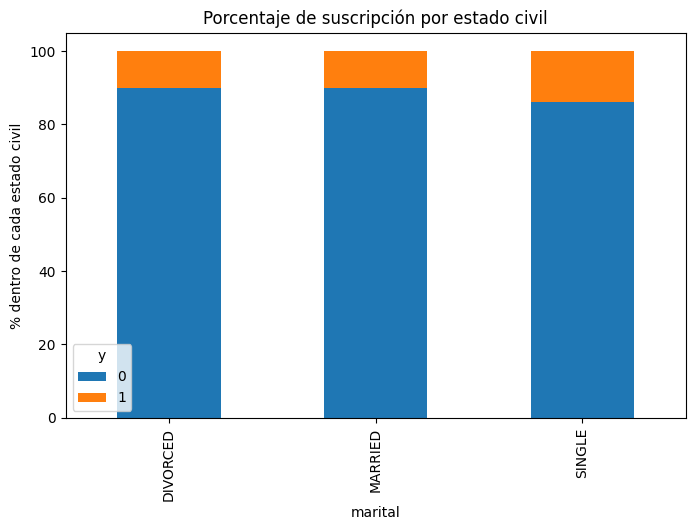

In [30]:
# 2. Identificar estados civiles con mayor o menor tasa de suscripción:
marital_y = df_merged.groupby('marital')['y'].value_counts(normalize=True).unstack().fillna(0) * 100
print(marital_y)
marital_y.plot(kind='bar', stacked=True, figsize=(8,5))
plt.ylabel('% dentro de cada estado civil')
plt.title('Porcentaje de suscripción por estado civil')
plt.show()

# Conclusión:

# Los solteros muestran un mayor interés en el producto, lo que podría deberse a que tienen más autonomía en la toma de 
# desiciones financieras, o necesidades distintas.
# No hay grandes diferencias entre casados y divorciados, pero ambos muestra menos disposición que los solteros.
# El gráfico refuerza que el estado civil es un factor relevante para segmentar la campaña, 
# enfocando el target a los solteros para mejorar las conversiones.

y                            0          1
education                                
basic.4y             89.715335  10.284665
basic.6y             91.869237   8.130763
basic.9y             92.185766   7.814234
high.school          89.158690  10.841310
illiterate           77.777778  22.222222
professional.course  88.679934  11.320066
university.degree    86.260022  13.739978


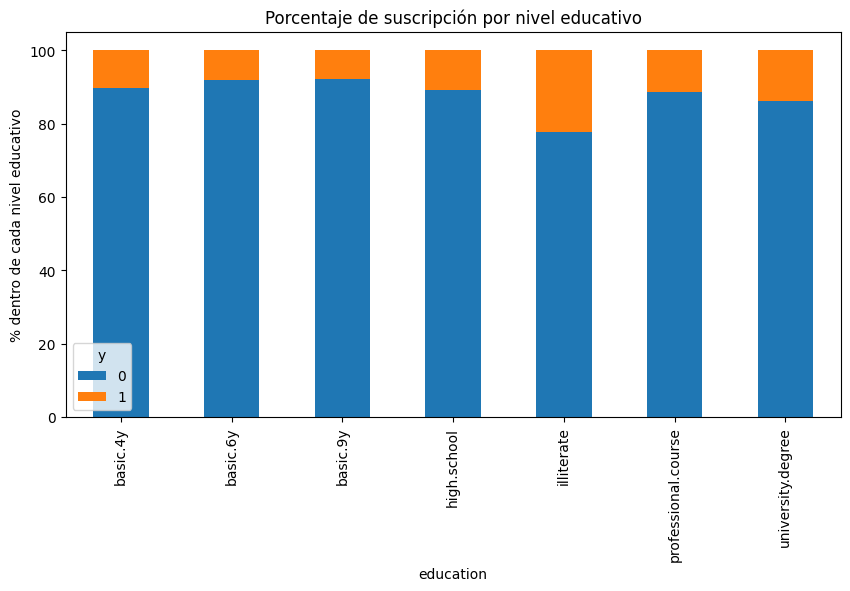

In [31]:
# 3. Identificar si el nivel de educación tiene influencia en la tasa de suscripción:
edu_y = df_merged.groupby('education')['y'].value_counts(normalize=True).unstack().fillna(0) * 100
print(edu_y)
edu_y.plot(kind='bar', stacked=True, figsize=(10,5))
plt.ylabel('% dentro de cada nivel educativo')
plt.title('Porcentaje de suscripción por nivel educativo')
plt.show()

# Conclusión:

# Se observa una tendencia clara: a mayor nivel educativo, mayor tasa de suscripción, especialmente entre quienes tienen 
# estudios universitarios o cursos profesionales.
# Los clientes con educación básica (entre 6 y 9 años) muestran menor interés en el producto, lo que podría deberse a 
# menor acceso a recursos, conocimiento financiero o desconfianza a productos complejos.
# El grupo 'Illiterate' destaca con una tasa inusualmente alta (22.2%). Probablemente el grupo es muy pequeño y con alta 
# variabilidad estadística.


y                0          1
housing                      
0        89.145615  10.854385
1        88.372300  11.627700


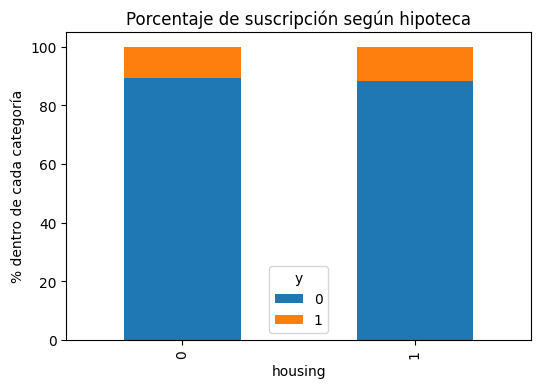

In [32]:
# 4. Identificar si tener obligaciones financieras como el préstamo hipotecario ('housing') influye en la suscripción:
housing_y = df_merged.groupby('housing')['y'].value_counts(normalize=True).unstack().fillna(0) * 100
print(housing_y)
housing_y.plot(kind='bar', stacked=True, figsize=(6,4))
plt.ylabel('% dentro de cada categoría')
plt.title('Porcentaje de suscripción según hipoteca')
plt.show()

# Conclusión:

# La tasa de suscripción es ligeramente mayor en clientes con préstamo hipotecario (housing = 1).
# Al ser una diferencia mínima entre los que tienen y los que no tienen un préstamo hipotecario, no se puede definir que estos grupos 
# sean considerados a la hora de realizar campañas con el objetivo de suscripción.

y             0          1
loan                      
0     88.665990  11.334010
1     89.084507  10.915493


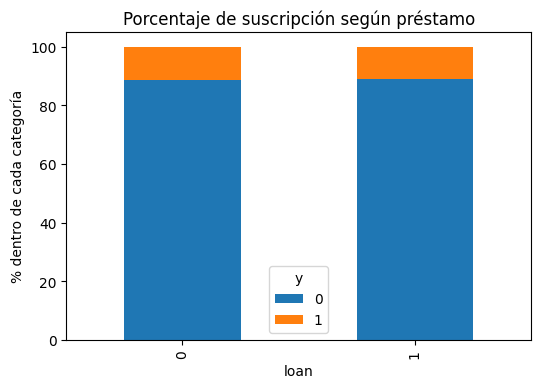

In [33]:
# 5. Identificar si tener obligaciones financieras como otro tipo de préstamos ('loan') influye en la suscripción:
loan_y = df_merged.groupby('loan')['y'].value_counts(normalize=True).unstack().fillna(0) * 100
print(loan_y)
loan_y.plot(kind='bar', stacked=True, figsize=(6,4))
plt.ylabel('% dentro de cada categoría')
plt.title('Porcentaje de suscripción según préstamo')
plt.show()

# Conclusión:

# La tasa de suscripción es ligeramente mayor en clientes que no tienen otro tipo de préstamos (loan = 0).
# Al ser una diferencia mínima entre los que tienen y los que no tienen otros tipos de préstamos, no se puede definir que estos grupos
# sean considerados a la hora de realizar campañas con el objetivo de suscripción.

Tasa de éxito (%) por tipo de contacto:
contact
cellular     14.743028
telephone     5.158934
dtype: float64


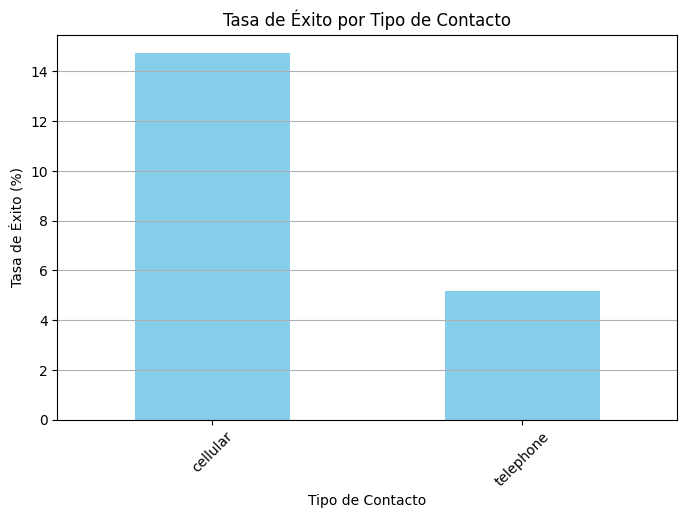

In [41]:
# 6. Identificar si la forma de contacto ('contact') influye en la suscripción:

# Asegurarse que 'y' es numérico (0 y 1)
df_merged['y'] = df_merged['y'].astype(int)

# Total registros por tipo de contacto
total_by_contact = df_merged.groupby('contact').size()

# Éxitos (y == 1) por tipo de contacto
success_by_contact = df_merged[df_merged['y'] == 1].groupby('contact').size()

# Tasa de éxito (%)
success_rate = (success_by_contact / total_by_contact * 100).fillna(0).sort_values(ascending=False)

print("Tasa de éxito (%) por tipo de contacto:")
print(success_rate)

# Gráfico
plt.figure(figsize=(8,5))
success_rate.plot(kind='bar', color='skyblue')
plt.title('Tasa de Éxito por Tipo de Contacto')
plt.xlabel('Tipo de Contacto')
plt.ylabel('Tasa de Éxito (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Conclusión:

# El tipo de contacto con mayor tasa de éxito es 'cellular', con un 14.74% de suscripciones.
# La tasa de éxito con 'cellular' es casi 3 veces mayor que la de 'telephone', lo que indica una influencia significativamente 
# más alta en la suscripción del producto.

📊 Tasa de éxito (%) según resultado de campaña anterior (poutcome):
poutcome
SUCCESS        65.320334
FAILURE        14.234477
NONEXISTENT     8.815999
dtype: float64


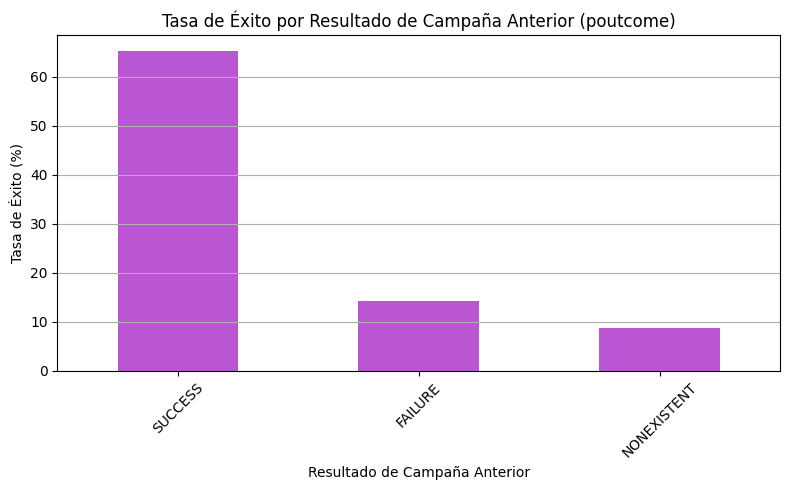

In [43]:
# 7. Identificar si el resultado de la campaña previa ('poutcome') influye en la suscripción:

# Asegurarse que 'y' es numérico (0 y 1)
df_merged['y'] = df_merged['y'].astype(int)

# Total de clientes por valor de 'poutcome'
total_by_poutcome = df_merged.groupby('poutcome').size()

# Total de suscripciones exitosas (y == 1) por 'poutcome'
success_by_poutcome = df_merged[df_merged['y'] == 1].groupby('poutcome').size()

# Calcular tasa de éxito (%)
success_rate_poutcome = (success_by_poutcome / total_by_poutcome * 100).fillna(0).sort_values(ascending=False)

# Mostrar resultados
print("📊 Tasa de éxito (%) según resultado de campaña anterior (poutcome):")
print(success_rate_poutcome)

# Visualización
plt.figure(figsize=(8,5))
success_rate_poutcome.plot(kind='bar', color='mediumorchid')
plt.title('Tasa de Éxito por Resultado de Campaña Anterior (poutcome)')
plt.xlabel('Resultado de Campaña Anterior')
plt.ylabel('Tasa de Éxito (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Conclusión:

# Los clientes que participaron con éxito en una campaña anterior (SUCCESS) tienen una tasa de suscripción del 65.32% en la campaña actual,
# lo que representa una influencia muy fuerte y positiva.
# En contraste, quienes fallaron en una campaña previa (FAILURE) solo convierten en un 14.23%, un valor moderadamente bajo.
# Los clientes que no participaron en ninguna campaña anterior (NONEXISTENT) tienen la tasa más baja: 8.82%,
# lo que indica que el contacto previo, especialmente exitoso, aumenta notablemente la probabilidad de suscripción.

# El historial positivo de interacción con campañas anteriores predice fuertemente el éxito actual.
# La falta de contacto previo (nonexistent) implica menor conocimiento del producto o menor interés, afectando negativamente.

📊 Tasa de suscripción (%) según historial de impago (default):
default
0    12.864534
1     0.000000
dtype: float64


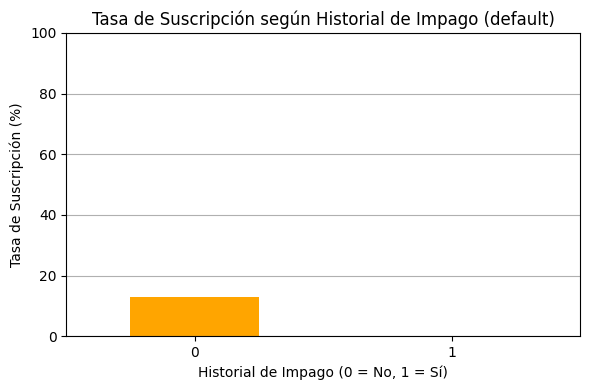

In [ ]:
# 8. Identificar si el historial de incumplimiento de pagos influye en la suscripción:

# Calcular total de clientes por grupo de default
total_by_default = df_merged.groupby('default').size()

# Calcular número de suscripciones exitosas por grupo
success_by_default = df_merged[df_merged['y'] == 'yes'].groupby('default').size()

# Calcular tasa de suscripción en porcentaje
success_rate_default = (success_by_default / total_by_default * 100).fillna(0)

# Mostrar resultados
print("📊 Tasa de suscripción (%) según historial de impago (default):")
print(success_rate_default)

# Visualización
plt.figure(figsize=(6,4))
success_rate_default.plot(kind='bar', color='orange')
plt.title('Tasa de Suscripción según Historial de Impago (default)')
plt.xlabel('Historial de Impago (0 = No, 1 = Sí)')
plt.ylabel('Tasa de Suscripción (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Conclusión:

# Ningún cliente con historial de impago se ha suscrito al producto bancario.
# Los clientes sin historial de impago tienen una tasa de suscripción significativa del 12.86%.
# Esta diferencia extrema indica que el historial crediticio ('default') tiene un fuerte impacto negativo sobre 
# la probabilidad de aceptación de la oferta.

# Los clientes con 'default = 1' representan un perfil de alto riesgo, y probablemente son descartados o no interesados por las campañas.



In [ ]:
# 📍 Punto de partida: El 89% de los clientes no suscribió el producto, mientras que el 11% sí que lo hizo.

# 🔎 Conclusión final sobre el análisis bivariado de las variables (numéricas y categóricas):

# Ante el análisis realizado de las variables numéricas y categóricas con su influencia en la suscripción, podemos afirmar que los siguientes
# grupos, características y segmentaciones deben ser incluidas en la realización de próximas campañas con el objetivo de suscripción, 
# al aumentar su tasa de éxito. Cabe destacar que otros grupos, características o segmentaciones pueden ser relevantes para una segunda campaña,
# pues aunque tengan menor tasa de éxito que los incluidos en la primera campaña, podremos obtener mayor número de suscripciones realizando 
# una segunda campaña:

# 🎯 Grupos, segmentaciones y características de la Campaña "Éxito Garantizado":

# 1. Cuanto más larga sea la llamada, más probabilidad existirá de convertirla en suscripción.
# 2. Establecer un rango óptimo de contactos por cliente de entre 3 y 6. Si el cliente no se ha suscrito tras los 6 contactos, eliminar. 
# En caso de que no se haya suscrito y el número de contactos sea inferior a 6, seguir contactando. No exceder en ningún caso los 6 contactos.
# 3. Si el cliente ya ha sido contactado, no deben pasar más de 30 días en volverse a producir el siguiente contacto.
# 4. Segmentación por edad: de 65 años en adelante. 
# 5. Segmentación por Profesiones: 'Student' y 'Retired'.
# 6. Segmentación por Estado Civil: 'Solteros'.
# 7. Segmentación por Nivel Educativo: 'University Degree', 'Professional Courses' e 'Illiterate'.
# 8. La forma de contactar al cliente debe ser por 'cellular'.
# 9. Clientes con el Resultado de la campaña anterior 'Success'.
# 10. Clientes sin historial de impagos ('default' = 0).

In [44]:
df_merged.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,age_group,income_group,pdays_group
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
089b39d8-e4d0-461b-87d4-814d71e0e079,NaN,housemaid,MARRIED,basic.4y,0,0,0,telephone,261,1,999,0,NONEXISTENT,1.1,NaN,NaN,NaN,5191.0,0,2-agosto-2019,41.495,-71.233,161770,1,0,2012-04-04,29,NaN,160k-180k,No contactado
e9d37224-cb6f-4942-98d7-46672963d097,57.0,services,MARRIED,high.school,<NA>,0,0,telephone,149,1,999,0,NONEXISTENT,1.1,NaN,NaN,NaN,5191.0,0,14-septiembre-2016,34.601,-83.923,85477,1,1,2012-12-30,7,55-64,80k-100k,No contactado
3f9f49b5-e410-4948-bf6e-f9244f04918b,37.0,services,MARRIED,high.school,0,1,0,telephone,226,1,999,0,NONEXISTENT,1.1,NaN,NaN,NaN,5191.0,0,15-febrero-2019,34.939,-94.847,147233,1,1,2012-02-02,5,35-44,140k-160k,No contactado
9991fafb-4447-451a-8be2-b0df6098d13e,40.0,admin.,MARRIED,basic.6y,0,0,0,telephone,151,1,999,0,NONEXISTENT,1.1,NaN,NaN,NaN,5191.0,0,29-noviembre-2015,49.041,-70.308,121393,1,2,2012-12-21,29,35-44,120k-140k,No contactado
eca60b76-70b6-4077-80ba-bc52e8ebb0eb,56.0,services,MARRIED,high.school,0,0,1,telephone,307,1,999,0,NONEXISTENT,1.1,NaN,NaN,NaN,5191.0,0,29-enero-2017,38.033,-104.463,63164,1,2,2012-06-20,20,55-64,60k-80k,No contactado
